# Hypothesis Testing using Statstical Methods

# Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness.
Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. 
Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

# Research Question

Is there a relationship between total fare amount and payment type?
Can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Load Libraries

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# Load data

In [2]:
file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\datasets\2021_Yellow_Taxi_Trip_Data.csv")

df = pd.read_csv(file_path)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2021 12:30:10 AM,01/01/2021 12:36:12 AM,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,01/01/2021 12:51:20 AM,01/01/2021 12:52:19 AM,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,01/01/2021 12:43:30 AM,01/01/2021 01:11:06 AM,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,01/01/2021 12:15:48 AM,01/01/2021 12:31:01 AM,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,01/01/2021 12:31:49 AM,01/01/2021 12:48:21 AM,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


# Basic understanding of data

In [3]:
df.shape

(30904072, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30904072 entries, 0 to 30904071
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 4.1+ GB


In [226]:
df.isna().sum()

VendorID                   834028
tpep_pickup_datetime     30894072
tpep_dropoff_datetime    30894072
passenger_count           1478695
trip_distance                   0
RatecodeID                1478695
store_and_fwd_flag        1478695
PULocationID                    0
DOLocationID                    0
payment_type               834028
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge       644667
dtype: int64

## data type conversion

In [223]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [224]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [229]:
df['duration_mins'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60

In [231]:
df['fare_amount'] = df['fare_amount'].astype('int64')

# perform Analysis for required columns only

In [232]:
df1 = df[['passenger_count','trip_distance','payment_type','fare_amount','duration_mins']]

In [259]:
df1.isna().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration_mins      0
dtype: int64

In [260]:
df1.duplicated().sum()

0

In [235]:
df1.drop_duplicates(inplace= True)

In [236]:
df1.shape

(669274, 5)

In [237]:
df1[['trip_distance','fare_amount','passenger_count','payment_type','duration_mins']].describe()

,trip_distance,fare_amount,passenger_count,payment_type,duration_mins
count,669274.000000,669274.000000,486214.000000,569911.000000,9884.000000
mean,184.057546,43.769580,2.345652,1.340729,13.495093
std,4742.249695,1213.738484,1.662497,0.900072,67.555873
min,0.000000,-758.000000,0.000000,0.000000,0.000000
25%,4.670000,22.000000,1.000000,1.000000,4.733333
50%,10.390000,38.000000,2.000000,1.000000,8.116667
75%,17.200000,56.000000,3.000000,2.000000,13.216667
max,351613.360000,818283.000000,112.000000,5.000000,1438.233333


In [238]:
df1['passenger_count'].value_counts(normalize=True)

passenger_count
1.0      0.410751
2.0      0.209064
3.0      0.117944
5.0      0.082836
4.0      0.081456
6.0      0.070115
0.0      0.027597
7.0      0.000101
8.0      0.000072
9.0      0.000060
112.0    0.000002
96.0     0.000002
Name: proportion, dtype: float64

In [239]:
df1['payment_type'].value_counts(normalize=True)

payment_type
1.0    0.471812
2.0    0.314688
0.0    0.146860
4.0    0.039606
3.0    0.027027
5.0    0.000007
Name: proportion, dtype: float64

In [240]:
df1 = df1[df1['payment_type'] < 3] 

df1 = df1[ (df1['passenger_count'] > 0) & (df1['passenger_count'] < 6)] 

In [241]:
df1['payment_type'].replace([1,2], ['card','cash'], inplace= True)

In [242]:
df1 = df1[df1['fare_amount'] > 0]

df1 = df1[df1['duration_mins'] > 0]

df1 = df1[df1['trip_distance'] > 0]

In [243]:
df1.describe()

,passenger_count,trip_distance,fare_amount,duration_mins
count,9062.000000,9062.000000,9062.000000,9062.000000
mean,1.426837,3.187024,11.670823,13.515742
std,0.878252,3.606987,10.184292,67.538616
min,1.000000,0.010000,2.000000,0.033333
25%,1.000000,1.100000,6.000000,4.866667
50%,1.000000,2.000000,8.000000,8.166667
75%,2.000000,3.700000,13.000000,13.162500
max,5.000000,45.920000,121.000000,1438.233333


## Remove Outliers using IQR

In [244]:
for i in ['trip_distance','fare_amount','duration_mins']:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3-q1
    
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)

In [245]:
lower_bound, upper_bound

(-7.577083333333335, 25.606250000000003)

In [246]:
df1 = df1[(df1[i] >= lower_bound) & (df1[i] <= upper_bound)]

In [247]:
df1.describe()

,passenger_count,trip_distance,fare_amount,duration_mins
count,8634.000000,8634.000000,8634.000000,8634.000000
mean,1.423095,2.693253,10.272875,8.987458
std,0.873529,2.520616,7.316567,5.476436
min,1.000000,0.010000,2.000000,0.033333
25%,1.000000,1.090000,6.000000,4.716667
50%,1.000000,1.900000,8.000000,7.825000
75%,2.000000,3.340000,12.000000,12.216667
max,5.000000,20.350000,105.000000,25.566667


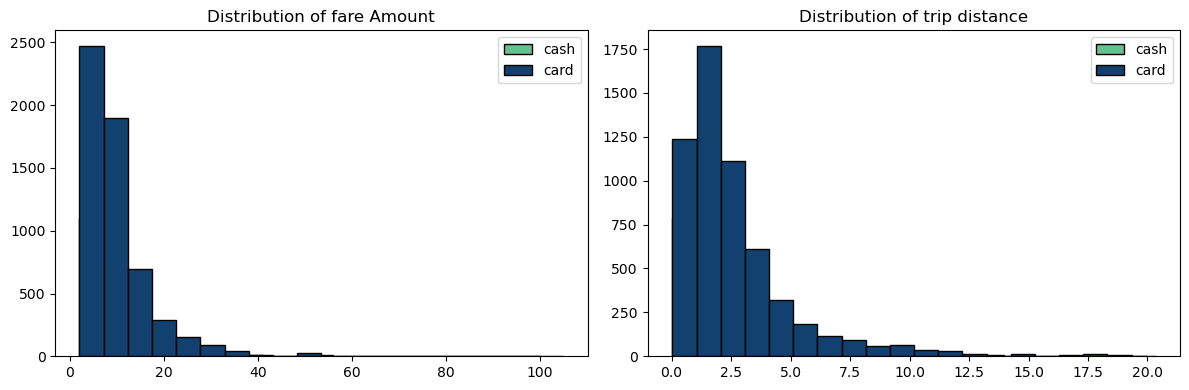

In [248]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Distribution of fare Amount')
plt.hist(df1[df1['payment_type'] == 'cash']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#67C090', label = 'cash') 
plt.hist(df1[df1['payment_type'] == 'card']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#124170', label = 'card')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df1[df1['payment_type'] == 'cash']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#67C090', label = 'cash') 
plt.hist(df1[df1['payment_type'] == 'card']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#124170', label = 'card')
plt.legend()

plt.tight_layout()
plt.show()

In [249]:
df1.groupby('payment_type').agg({'fare_amount' : ['mean','std'], 'trip_distance' : ['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card           10.245565  7.184628      2.685776  2.478333
cash           10.325740  7.566394      2.707729  2.600880

In [250]:
pie_data  = df1['payment_type'].value_counts(normalize=True)
pie_data

payment_type
card    0.65937
cash    0.34063
Name: proportion, dtype: float64

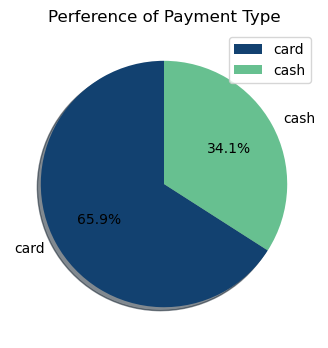

In [251]:
plt.figure(figsize=(10,4))

plt.pie(pie_data, labels = pie_data.index, autopct= '%1.1f%%', startangle= 90, shadow= True, colors = ['#124170','#67C090'])
plt.title('Perference of Payment Type', fontsize = 12)

plt.legend()
plt.show()

In [252]:
df1

,passenger_count,trip_distance,payment_type,fare_amount,duration_mins
0,1.0,2.10,cash,8,6.033333
1,1.0,0.20,cash,3,0.983333
4,1.0,4.94,card,16,16.533333
5,1.0,1.60,card,8,8.016667
6,1.0,4.10,cash,16,17.000000
...,...,...,...,...,...
9995,1.0,4.87,cash,15,14.383333
9996,1.0,1.60,cash,8,8.033333
9997,1.0,0.54,card,4,2.116667
9998,1.0,2.77,card,11,10.783333


In [253]:
grouped_passenger_count = df1.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
grouped_passenger_count = grouped_passenger_count.rename(columns={'passenger_count':'count'})
grouped_passenger_count = grouped_passenger_count.reset_index()
grouped_passenger_count['perc_count'] = grouped_passenger_count['count'] / (grouped_passenger_count['count'].sum())*100

grouped_passenger_count

,payment_type,passenger_count,count,perc_count
0,card,1.0,4163,48.216354
1,card,2.0,982,11.373639
2,card,3.0,282,3.266157
3,card,4.0,116,1.343526
4,card,5.0,150,1.737318
5,cash,1.0,2237,25.909196
6,cash,2.0,437,5.061385
7,cash,3.0,146,1.690989
8,cash,4.0,54,0.625434
9,cash,5.0,67,0.776002


In [254]:
pivot = grouped_passenger_count.pivot_table(
    values="perc_count",
    index="payment_type",
    columns="passenger_count"
).reset_index()


In [255]:
pivot.columns.name = None

In [256]:
pivot

,payment_type,1.0,2.0,3.0,4.0,5.0
0,card,48.216354,11.373639,3.266157,1.343526,1.737318
1,cash,25.909196,5.061385,1.690989,0.625434,0.776002


<Figure size 1000x200 with 0 Axes>

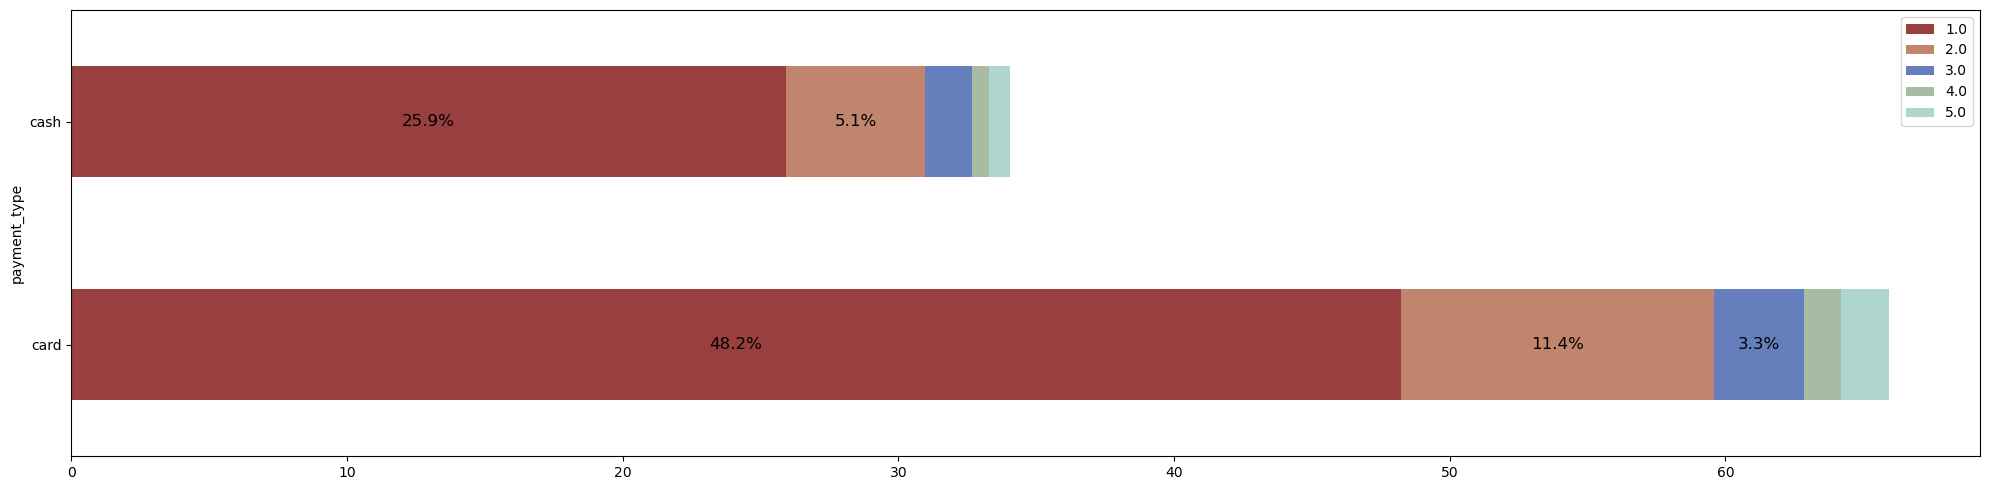

In [262]:
plt.figure(figsize=(10,2))

ax = pivot.plot(x='payment_type', kind='barh', stacked=True, figsize=(20,5), color = ['#9A3F3F','#C1856D','#647FBC','#A8BBA3','#AED6CF'])

for container in ax.containers:
    labels = []
    for v in container.datavalues:
        if v > 2:   # show label only if value > 2 (tune threshold as needed)
            labels.append(f"{v:.1f}%")
        else:
            labels.append("")  # skip small values
    ax.bar_label(container, labels=labels, label_type='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# Hypothesis testing

<Figure size 800x400 with 0 Axes>

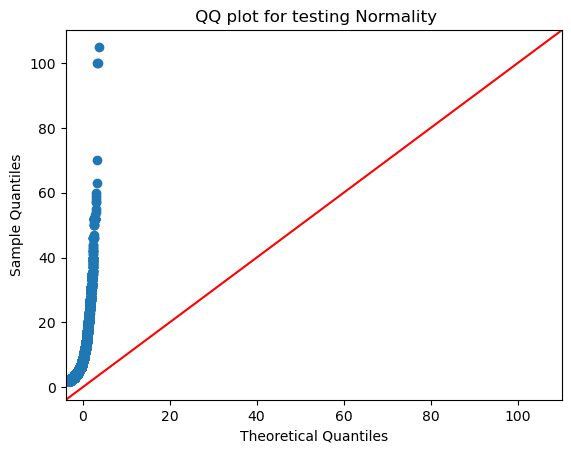

In [267]:
plt.figure(figsize=(8,4))
sm.qqplot(df1['fare_amount'], line= '45')
plt.title(" QQ plot for testing Normality")

plt.show()

In [270]:
card_sample = df1[df1['payment_type'] == 'card']['fare_amount']
cash_sample = df1[df1['payment_type'] == 'cash']['fare_amount']

In [271]:
t_stats, p_value = st.ttest_ind(card_sample, cash_sample, equal_var = False)

In [274]:
print('T-statistics : ',t_stats, 'p_value :',p_value)

T-statistics :  -0.47463694153803776 p_value : 0.6350640177005549


In [275]:
alpha = 0.05

In [277]:
if p_value < alpha:
    print('Reject Null hypothesis >> There is no difference in avg fare amount between customer who use cards or cash')
else:
    print('fail to reject hypothesis >> There is difference in avg fare amount between customer who use cards or cash')
    

fail to reject hypothesis >> There is difference in avg fare amount between customer who use cards or cash
